In [1]:
# importando bibliotecas

from gurobipy import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# criando os dados

# vértices
N = 21

# coordenadas
np.random.seed(1)
X = list(np.random.random(N) * 100)
Y = list(np.random.random(N) * 100)

# demandas
demanda = list(np.random.randint(low=10, high=50, size=N))

In [5]:
Color = { 
    0 : 'blue',
    1 : 'orange',
    2 : 'green',
    3 : 'red',
    4 : 'purple',
    5 : 'brown',
    6 : 'pink',
    7 : 'gray',
    8 : 'olive',
    9 : 'cyan',
    10 : 'yellow',
    11 : 'violet',
    12 : 'lime',
    13 : 'azure',
    14 : 'gold',
    15 : 'tan'
}

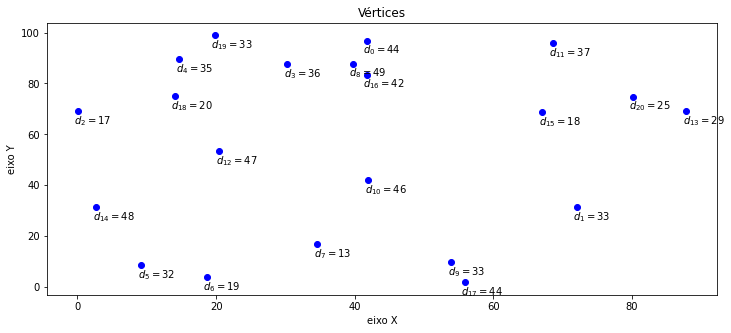

In [3]:
# gráfico das coordenadas com suas respectivas demandas

plt.figure(figsize=(12,5))
plt.scatter(X,Y,color='blue')

for i in range(len(X)):
    plt.annotate('$d_{%d} = %d$' %(i,demanda[i]), (X[i]-0.5, Y[i]-5))

plt.xlabel("eixo X")
plt.ylabel("eixo Y")
plt.title("Vértices")
plt.show()

In [4]:
# definindo os conjuntos

# vértices
vertices = [i for i in range(N)]

# localizações
localizacoes = [i for i in vertices]

# arcos
arcos = [(i,j) for i in vertices for j in localizacoes]

# número máximo de localizações
p = 5

# matriz de distâncias
distancia = {(i,j) : 
             np.hypot(X[i]-X[j],Y[i]-Y[j]) for i in vertices for j in localizacoes
            }

# P-center problem


Conjuntos e parâmetros:

- vertices: conjunto de vértices que representam clientes, $I = \{1, \ldots, n \}$

- localizacoes: conjunto de vértices que representam os candidatos a localizações.

- arcos: conjunto que representa as arestas entre clientes e localizações.

- p: número máximo de instalações a se utilizar.

- $w$: vetor de peso de cada cliente $i \in I$.


Variáveis de decisão:

- $x_{ij}$: 1, se o cliente $i$ é servido pela localização $j$, 0 caso contrário.

- $y_{j}$: 1, se foi instalada uma localização no vértice $j$, 0 caso contrário.


Formulação:

$
\begin{align*}
\min \ & z \\
& \sum_{i \in I} c_{ij} x_{ij} w_{i} \leq z \ \forall j \in J \\
& \sum_{j \in J} x_{ij} = 1 \ \forall i \in I \\
& \sum_{j \in J} y_{j} = p \\
& \sum_{i \in I} x_{ij} - M y_{j} \leq 0 \ \forall j \in J \\
& x_{ij} \in \mathbb{B}^{|I \times J|} \\
& y_{j} \in \mathbb{B}^{|J|}
\end{align*}
$

In [6]:
# pesos
demanda_total = sum(demanda)

w = {i: demanda[i]/demanda_total for i in localizacoes}

In [7]:
# formulação

# modelo
model = Model('P-center')

# variáveis
x = model.addVars(arcos, vtype=GRB.BINARY, name='x')
y = model.addVars(localizacoes, vtype=GRB.BINARY, name='y')
z = model.addVar(vtype=GRB.CONTINUOUS, name='z')

# função objetivo
model.setObjective(z,GRB.MINIMIZE)

# restrições
model.addConstrs(quicksum(distancia[i,j]*x[i,j]*w[i] for i in vertices) <= z 
                 for j in localizacoes)
model.addConstrs(quicksum(x[i,j] for j in localizacoes) == 1 for i in vertices)
model.addConstr(quicksum(y[j] for j in localizacoes) <= p)
# M restrição
M = len(localizacoes)
model.addConstrs(quicksum(x[i,j] for i in vertices) - M * y[j] <= 0 for j in localizacoes)

# resolvendo
model.optimize()


--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-07-15
Using license file /opt/gurobi912/gurobi.lic
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 64 rows, 463 columns and 1365 nonzeros
Model fingerprint: 0x0d218162
Variable types: 1 continuous, 462 integer (462 binary)
Coefficient statistics:
  Matrix range     [3e-01, 2e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Found heuristic solution: objective 18.4630978
Presolve time: 0.00s
Presolved: 64 rows, 463 columns, 1365 nonzeros
Variable types: 1 continuous, 462 integer (462 binary)

Root relaxation: objective 0.000000e+00, 98 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumb

In [8]:
# arcos ativos

arcos_ativos = [k for k in arcos if x[k].x > 0.9]
print(arcos_ativos)

[(0, 8), (1, 15), (2, 14), (3, 8), (4, 4), (5, 14), (6, 14), (7, 9), (8, 8), (9, 9), (10, 9), (11, 8), (12, 4), (13, 15), (14, 14), (15, 15), (16, 8), (17, 9), (18, 4), (19, 4), (20, 15)]


In [9]:
# localizações ativas

localizacoes_ativas = [k for k in vertices if y[k].x > 0.9]
print(localizacoes_ativas)

[4, 8, 9, 14, 15]


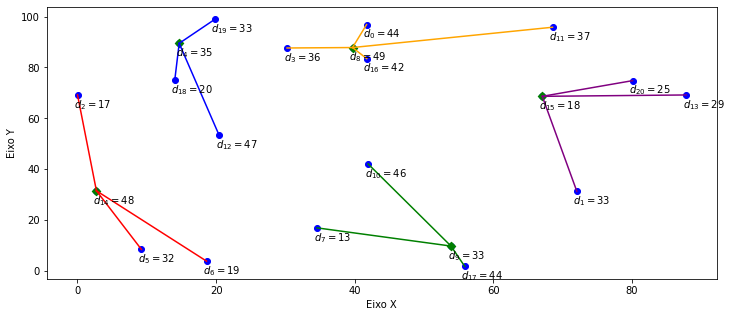

In [10]:
# grafico da solução

plt.figure(figsize=(12,5))
plt.scatter(X,Y,color='blue')

for n in localizacoes_ativas:
    plt.scatter(X[n],Y[n],color='green',marker='D')
    
for i in range(len(X)):
    plt.annotate('$d_{%d} = %d$' %(i,demanda[i]), (X[i]-0.5, Y[i]-5))
    

              
for n in arcos_ativos:
    i = n[0]
    j = n[1]
    plt.plot([X[i],X[j]],
             [Y[i],Y[j]],
             color=Color[localizacoes_ativas.index(j)]
            )

plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.show()